In [1]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib as plt
from joblib import dump, load

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# 1. Data Preprocessing

In [2]:
kaggle.api.authenticate()
kaggle_dataset = 'jruvika/fake-news-detection'
kaggle.api.dataset_download_files(kaggle_dataset, path='data/', unzip=True)

In [3]:
# Read in data
# 1 if the article is true, 0 if the article is fake
df = pd.read_csv('data/data.csv')
df = df.dropna() # TODO: explore NAs
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


# 2. Data Analysis

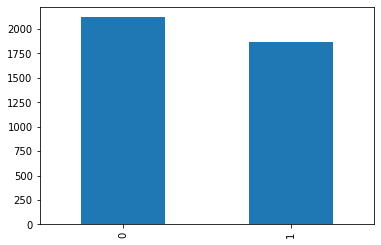

In [4]:
df.Label.value_counts().plot.bar();

# 3. Feature Selection

In [5]:
y = df.Label
X = df.drop(['Label', 'URLs'], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True)

#  4. Modeling

In [7]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [8]:
text_clf.fit(X_train.Body, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [9]:
# Save model
dump(text_clf, 'models/nb_model.joblib')

['models/nb_model.joblib']

# 5. Evaluation 

In [10]:
loaded_text_clf = load('models/nb_model.joblib') 
predicted = loaded_text_clf.predict(X_test.Body)

In [11]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       663
           1       0.89      0.97      0.92       534

    accuracy                           0.93      1197
   macro avg       0.93      0.93      0.93      1197
weighted avg       0.93      0.93      0.93      1197



In [12]:
metrics.confusion_matrix(y_test, predicted)

array([[596,  67],
       [ 17, 517]])

# 6. Extract Article from URL 

In [13]:
import newspaper

In [14]:
url = 'https://www.bbc.com/news/world-us-canada-53507660'
article = newspaper.Article(url) 
article.download()
article.parse()

In [15]:
article.text

'Media playback is unsupported on your device Media caption Trump: Americans should walk city streets free from violence and fear\n\nPresident Donald Trump is to send "a surge" of federal security forces to US cities in a crackdown on crime.\n\nChicago and two other Democratic-run cities are being targeted in the Republican president\'s move, amid a spike in violence.\n\nBut federal deployments in Portland, Oregon, amid ongoing unrest have been controversial. The city\'s mayor was among those tear-gassed at a protest.\n\nLaw and order has become a key plank of Mr Trump\'s re-election bid in November.\n\nSince the death on 25 May of an unarmed black man, George Floyd, in police custody in Minneapolis, Minnesota, there have been protests - sometimes descending into civil disorder - in scores of US cities.\n\nIn Portland, which has seen more than 50 days of demonstrations, Mayor Ted Wheeler was tear-gassed by federal agents while attending the city\'s protest on Wednesday night.\n\nSpeaki